# Description

It uses the `clustree` package to generate clustering tree visualizations.

# Modules loading

In [1]:
library(clustree)
library(tidyverse)

Loading required package: ggraph

Loading required package: ggplot2

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Settings

In [2]:
CLUSTERING_DIR <- Sys.getenv("PHENOPLIER_RESULTS_CLUSTERING_DIR")

In [3]:
CLUSTERING_DIR

[1] "/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering"

In [4]:
CONSENSUS_CLUSTERING_DIR = file.path(CLUSTERING_DIR, "consensus_clustering")

In [5]:
CONSENSUS_CLUSTERING_DIR

[1] "/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering"

# Load data

In [6]:
data <- read_tsv(file.path(CONSENSUS_CLUSTERING_DIR, "clustering_tree_data.tsv"))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  trait = col_character(),
  labels = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [7]:
dim(data)

[1] 3749   27

In [8]:
head(data)

trait,PCA1,PCA2,PCA3,PCA4,PCA5,UMAP1,UMAP2,UMAP3,UMAP4,⋯,k5,k14,k38,k41,k28,k24,k22,k26,k45,labels
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
100001_raw-Food_weight,-0.5475154,-0.007250061,0.2453609,0.1324236,1.2014467,-8.437452,1.664409,9.233617,6.944210,⋯,0,0,30,33,26,22,1,0,34,NA
100002_raw-Energy,-1.5705932,-0.618991513,-1.2233953,1.6273214,-0.5638599,-8.388347,1.670845,9.251021,6.975690,⋯,0,0,30,33,26,22,1,0,34,NA
100003_raw-Protein,-0.6012120,-0.948823774,-1.0222088,2.4384326,-2.0622345,-8.424020,1.696144,9.226449,6.970763,⋯,0,0,30,33,26,22,1,0,34,NA
100004_raw-Fat,-1.6482135,-0.342041946,-0.2701891,1.6832677,-1.2224012,-8.393674,1.685311,9.258855,6.992673,⋯,0,0,30,33,26,22,1,0,34,NA
100005_raw-Carbohydrate,-1.8675862,-0.006411668,-0.3032200,0.7709577,-0.1168217,-8.427763,1.685172,9.234971,6.967204,⋯,0,0,30,33,26,22,1,0,34,NA
100006_raw-Saturated_fat,-1.8547491,-0.517421365,-0.4050653,1.7282848,-1.4206312,-8.388267,1.698937,9.246135,6.977351,⋯,0,0,30,33,26,22,1,0,34,NA


# Plot clustering tree

## Plain

Warning message:
“The `add` argument of `group_by()` is deprecated as of dplyr 1.0.0.
Please use the `.add` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


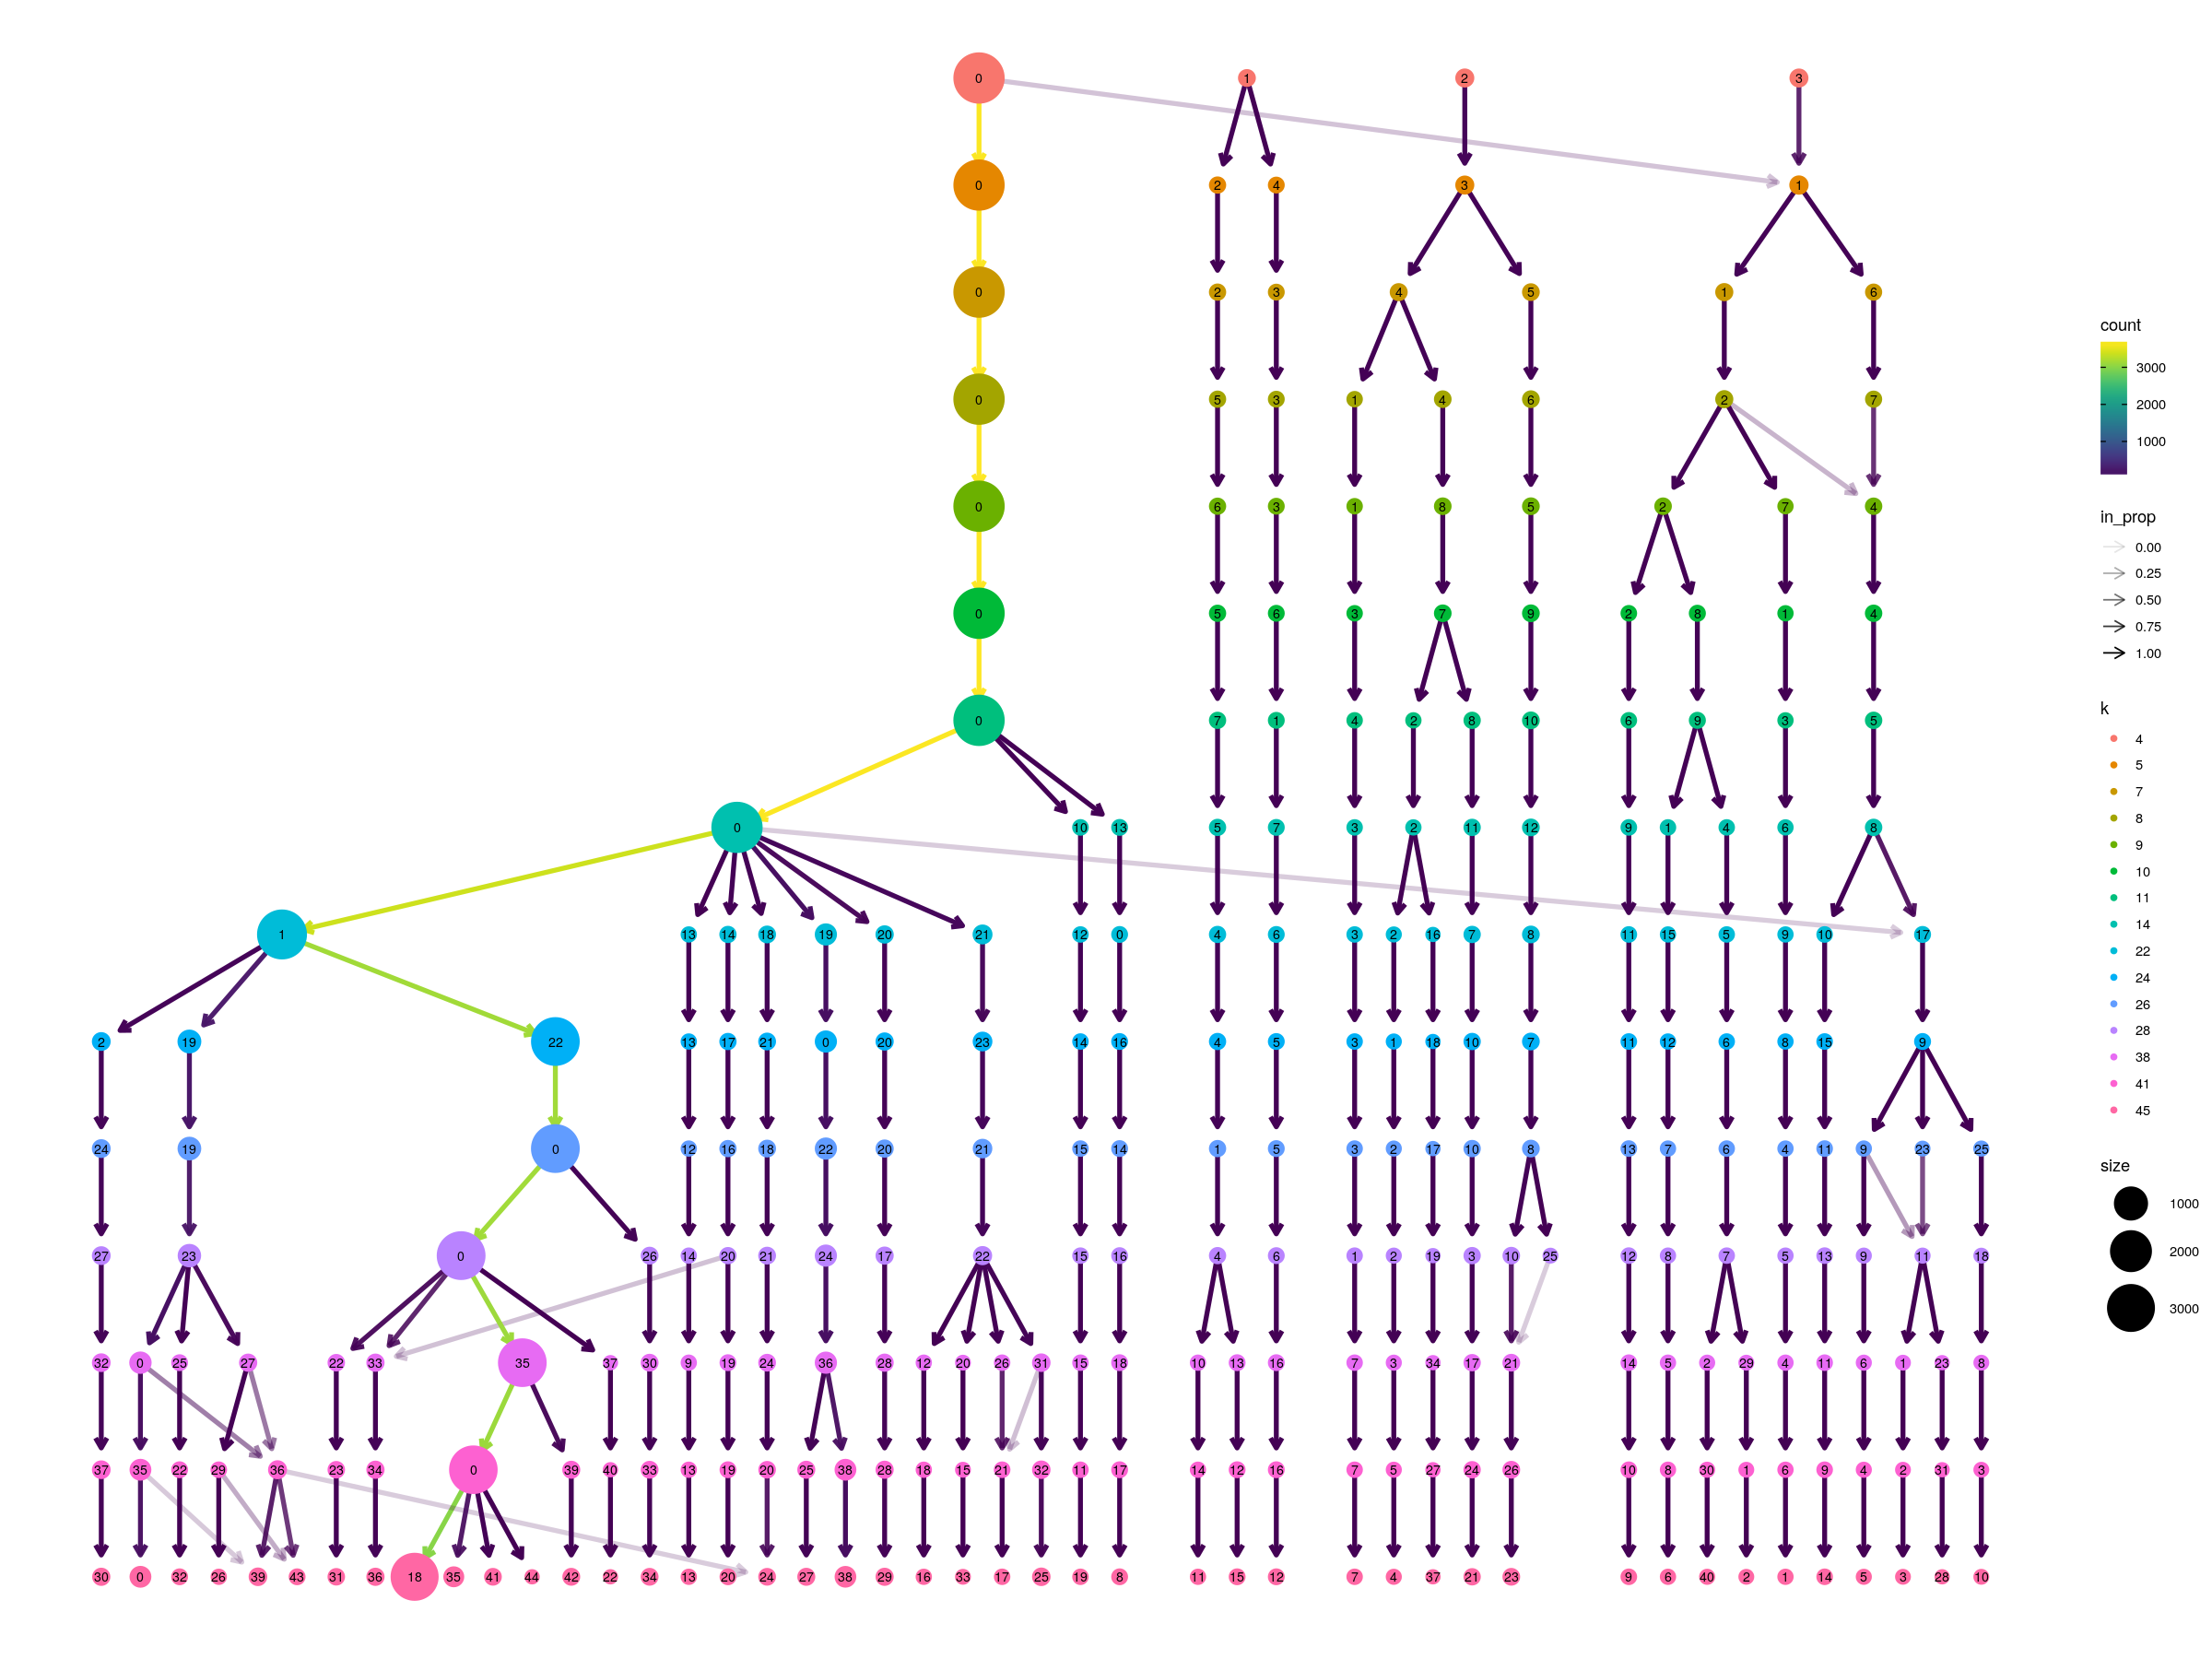

In [9]:
options(repr.plot.width = 20, repr.plot.height = 15)
clustree(data, prefix = "k")

ggsave(
    "/tmp/clustering_tree.pdf",
    height=15,
    width=20,
    scale=1,
)

## With labels

In [10]:
# label_position <- function(labels) {
#     if (length(unique(labels)) == 1) {
#         position <- as.character(unique(labels))
#     } else {
#         position <- NA
#     }
#     return(position)
# }

# options(repr.plot.width = 25, repr.plot.height = 15)
# clustree(data, prefix = "k", node_label="labels", node_label_aggr = "label_position")

# Plot overlay

## With PCA

In [11]:
# options(repr.plot.width = 15, repr.plot.height = 11)
# clustree_overlay(data, prefix = "k", x_value = "PCA1", y_value = "PCA2")

## With UMAP

In [12]:
# options(repr.plot.width = 15, repr.plot.height = 11)
# clustree_overlay(data, prefix = "k", x_value = "UMAP1", y_value = "UMAP2")